# Морфология 2
В данном ноутбуке находится задание на триграммы и словарь. В качестве текста будем использовать томик войны и мира: https://goo.gl/qcVTLE 

Для начала напомним некоторые полезные инструменты на питоне

## 1. Инструменты

### 1.1. Регулярные выражения
Исчерпывающий пост https://habr.com/ru/post/349860/

In [12]:
import re

# С помощью рег. выражения можно искать, заменять и сентезировать строки по шаблонам
# Парочка простых примеров
numbers = re.findall(r'\d+', r'There is some numbers: 49 and 432')
print(u'Находим числа в строке: ', numbers)

print(u'Простенький токенизатор: ', re.sub('[,\.?!]',' ','How, to? split. text!').split())

print(u'Еще один токенизатор: ', re.split(r'\W+', 'How, to? split. text! Again'))

# в качестве тренировки придумайте свой токенизатор в случае, когда из текста нужно получить только русские слова.
print(u'Русский токенизатор: ', re.findall(r'[а-яА-я]+', 'Простенький токенизатор Again'))

Находим числа в строке:  ['49', '432']
Простенький токенизатор:  ['How', 'to', 'split', 'text']
Еще один токенизатор:  ['How', 'to', 'split', 'text', 'Again']
Русский токенизатор:  ['Простенький', 'токенизатор']


### 1.2. Чтение файлов
Чтобы не мучится самим с кодировками, приведем способ чтения файла корпуса.

In [18]:
import io
wordlilist = None
text_file_path = 'wp.txt'
with io.open(text_file_path, "r", encoding='utf-8') as text_file:
    text = text_file.read()
    wordlist = re.findall(r'[а-я]+', text.lower())
    # wordlist = Здесь заиспользуем токенизатор. Также приведем все слова к нижнему регистру.

### 1.3. ООП
В питоне можно создавать свои классы, скорее всего нам понадобится класс для хранения бора

In [72]:
def add_key(w, key):
    if w is not None:
        for i in range(len(w)):          
            w[i] = key + w[i]
    return w

def updatewd(w, d, mw, md, key):
    if w is not None:
        if d > md:
            mw = add_key(w, key)
            md = d
        elif d == md:
            if mw is not None:
                mw.extend(add_key(w, key))
            else:
                mw = add_key(w, key)
    return mw, md

class Node():
    def __init__(self):
        self.moves = {}
        self.fin = False
        
    def get(Node, symb):
        return self.moves.get(symb, None)
    
    def push(self, word):
        if len(word) == 0:
            self.fin = True
            return
        s = word[0]
        if not s in self.moves:
            self.moves[s] = Node()
        self.moves[s].push(word[1:])
        
    def find(self, word, dist):
        if len(word) == 0:
            if self.fin:
                return [""], dist
            if dist > 0:
                md = 0
                mw = None
                for key in self.moves:
                    w, d = self.moves[key].find(word, dist-1)
                    mw, md = updatewd(w, d, mw, md, key)
                        
                return mw, md
            return None, 0
        
        md = 0
        mw = None
        for key in self.moves:
            if key == word[0]:
                w, d = self.moves[key].find(word[1:], dist)
                mw, md = updatewd(w, d, mw, md, key)
            elif dist > 0:
                #insert
                w, d = self.moves[key].find(word, dist-1)
                mw, md = updatewd(w, d, mw, md, key)
                #change
                w, d = self.moves[key].find(word[1:], dist-1)
                mw, md = updatewd(w, d, mw, md, key)
        #skip 
        if dist > 0:
            w, d = self.find(word[1:], dist-1)
            mw, md = updatewd(w, d, mw, md, "")
        #ab->ba = skip(a)-b-insert(a)

        return mw, md
    
# все данные хранятся в self, поэтому он и передается первым аргументом во все методы

### 1.4. pyplot
Довольно часто приходится построить какие-нибудт графики и гистограммы для изучения данных, с которыми придется работать. Для этого в питоне есть удобнейший модуль для этого - pyplot. Туториал: https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html

In [22]:
#!pip install matplotlib # Установка модуля
import matplotlib.pyplot as plt
# команда чтобы картинки рисовались прямо в ноутбуке
%matplotlib inline 

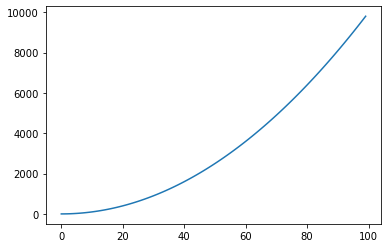

In [23]:
# Посмотрим на график функции x^2
data = [i * i for i in range(100)]
plt.plot(data)

(array([32., 13., 10.,  8.,  8.,  6.,  6.,  6.,  5.,  6.]),
 array([   0. ,  980.1, 1960.2, 2940.3, 3920.4, 4900.5, 5880.6, 6860.7,
        7840.8, 8820.9, 9801. ]),
 <a list of 10 Patch objects>)

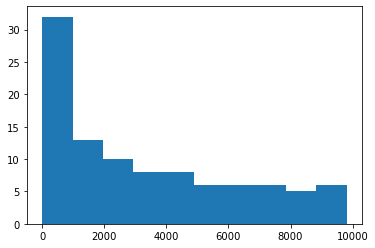

In [24]:
# и распределение по значениям
plt.hist(data)

Также полезная команда для подсчета времения выполнеия в ячейке

In [25]:
%%time
res = 0
for i in range(int(1e8)):
    res += 1

Wall time: 7.85 s


## 2. Задание
Собственно теперь нам потребуется написать подсчет триграмм и бор для словаря, чтобы реализовать простенькую систему исправления ошибок.

### 2.1. Триграммы
Для начала получим словарь триграмма - её кол-во в тексте, не забывая о начале и конце слова.

Далее можно построить гистограмму на кол-во вхождений триграмм, и посмотреть самые частые и какая частота у каких-нибудь заведомо странных, например: 'чгк', 'шкя' и подобные. Из полученных данных придумать эвристику, как считать слово с опечаткой. Проверить эвристику по словарю.

In [64]:
from collections import defaultdict

def corpus_trigrams(word_list):
    k = 3
    ngramms = defaultdict(float)
    
    for word in word_list:
        word = '##' + word + "##"
        if len(word) == k + 4:
            ngramms[word] += 1
        for j in range(len(word) - k + 1):
            ngramms[word[j:k+j]] += 1

    total = sum(list(ngramms.values()))
    for j in ngramms.keys():
        ngramms[j] /= total
    return ngramms

def is_error(word, vocab, limit):
    k = 3
    word = '##' + word + "##"
    if len(word) == k + 4 and word in vocab:
        return False
    for i in range(len(word) - k - 1):
        if vocab.get(word[i:i+k], 0) + vocab.get(word[i+1:i+k+1], 0) + \
                vocab.get(word[i+2:i+k+2], 0) < limit:
            return True
    return False

vocab = corpus_trigrams(wordlist)

In [65]:
limit = 5e-5
errors = sum([is_error(word, vocab, limit) for word in wordlist])
print("Corpus size: {0}, euristic errors: {1}".format(len(wordlist), errors))
print("Содержит ли ошибку слово {0} : {1}".format("нибо", is_error("нибо", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("собака", is_error("собака", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("карава", is_error("карава", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("едрво", is_error("едрво", vocab, limit)))

Corpus size: 104374, euristic errors: 1065
Содержит ли ошибку слово нибо : False
Содержит ли ошибку слово собака : False
Содержит ли ошибку слово карава : False
Содержит ли ошибку слово едрво : False


In [66]:
limit = 1e-4
errors = sum([is_error(word, vocab, limit) for word in wordlist])
print("Corpus size: {0}, euristic errors: {1}".format(len(wordlist), errors))
print("Содержит ли ошибку слово {0} : {1}".format("нибо", is_error("нибо", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("собака", is_error("собака", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("карава", is_error("карава", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("едрво", is_error("едрво", vocab, limit)))

Corpus size: 104374, euristic errors: 3196
Содержит ли ошибку слово нибо : False
Содержит ли ошибку слово собака : False
Содержит ли ошибку слово карава : False
Содержит ли ошибку слово едрво : True


In [67]:
limit = 2e-4
errors = sum([is_error(word, vocab, limit) for word in wordlist])
print("Corpus size: {0}, euristic errors: {1}".format(len(wordlist), errors))
print("Содержит ли ошибку слово {0} : {1}".format("нибо", is_error("нибо", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("собака", is_error("собака", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("карава", is_error("карава", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("едрво", is_error("едрво", vocab, limit)))

Corpus size: 104374, euristic errors: 8724
Содержит ли ошибку слово нибо : True
Содержит ли ошибку слово собака : False
Содержит ли ошибку слово карава : False
Содержит ли ошибку слово едрво : True


In [68]:
limit = 5e-4
errors = sum([is_error(word, vocab, limit) for word in wordlist])
print("Corpus size: {0}, euristic errors: {1}".format(len(wordlist), errors))
print("Содержит ли ошибку слово {0} : {1}".format("нибо", is_error("нибо", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("собака", is_error("собака", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("карава", is_error("карава", vocab, limit)))
print("Содержит ли ошибку слово {0} : {1}".format("едрво", is_error("едрво", vocab, limit)))

Corpus size: 104374, euristic errors: 24492
Содержит ли ошибку слово нибо : True
Содержит ли ошибку слово собака : True
Содержит ли ошибку слово карава : False
Содержит ли ошибку слово едрво : True


### 2.2. Бор
Далее построим бор, с помощью которого будем искать исправления опечатки в слове. Пока только в случае замены и удаления в конце (Если есть желание, то можно и для всех случаев). Также сравнить по времени с поиском в случае замены в исходном слове последних двух символов и поиске в словаре.

In [110]:
def build_bor(wordlist):
    bor = Node()
    for word in wordlist:
        bor.push(word)
    return bor


def correct_word(bor, word):
    '''returns most similar word from dictionary'''
    res = bor.find(word, len(word)//3)[0]
    if res:
        return res[0]
    else:
        return word

def char_range(c1, c2):
    """Generates the characters from `c1` to `c2`, inclusive."""
    for c in range(ord(c1), ord(c2)+1):
        yield chr(c)

def correct_word_naive(word_dict, word):
    '''correct word using generation'''
    if len(word) < 2 or word in word_dict:
        return word
    pref = word[-2:]
    candidates = []
    for f in char_range('a', 'я'):
        for s in char_range('a', 'я'):
            candidate = pref + f + s
            if candidate in word_dict:
                if f == word[-2] or s == word[-1]:
                    return candidate
                candidates.append(candidate)
    if candidates:
        return candidates[0]
    else:
        return word
    
bor = build_bor(wordlist)

In [92]:
word_dict = set(wordlist[:100])

In [80]:
print(correct_word(bor, "ебо"))
print(correct_word(bor, "лашадь"))
print(correct_word(bor, "едрево"))

небо
лошадь
зарево


In [86]:
%%time
for word in wordlist[:100]:
    correct_word(bor, word) 

Wall time: 7.98 s


In [91]:
correct_word_naive(st, "рамл")

'рамл'

In [95]:
%%time
res = [correct_word_naive(word_dict, word + 'a') for word in wordlist[:100]]

Wall time: 1min 28s


### 2.3 Все вместе
Теперь соберем поиск и исправление опечаток в одну систему, которая будет принимать текст и править его. Также замерим скорость по сравнению с "менее наивным подходом".

In [118]:
def correct_mistakes(bor, vocab, text):
    tokens = re.findall(r'[а-я]+', text.lower())
    res = []
    for word in tokens:
        if is_error(word, vocab, 1e-3):
            res.append(correct_word(bor, word))
        else:
            res.append(word)
    return ' '.join(res)

def correct_mistakes_naive(word_dict, text):
    '''returns corrected text using generation'''
    tokens = re.findall(r'[а-я]+', text.lower())
    res = []
    for word in tokens:
        res.append(correct_word_naive(word_dict, word))
    return ' '.join(res)

In [119]:
sample = '''лев николаевич талстой война и мип том чусть пегвая е паместья мой верный рап ну что князь генуа и лука стали не
бальше как паместьяни фамили бонапарте нет я вас предупреждааю если вы мне ни скажете что у нас вайна если вы еще позволете 
себе зашишать все гадасты все ужаси этого антихриста права я верю что он антехрест я вас больше не знаю вы уж не друх мой вы 
уш не мой верный раб как вы говориде ну здравствуйде здравствуйте я вижу что я вас пугаю садитесь и расказывайте так гаворила
в июле года известная анна павловна шерер фрейлина и'''

In [120]:
%%time
correct_mistakes(bor, vocab, sample) 

Wall time: 2.89 s


'лев николаевич толстой война и мир том часть первая е поместья мой верный нап ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне ни скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста права я верю что он антихрист я вас больше не знаю вы уж не друг мой вы уш не мой верный раб как вы говорите ну здравствуйте здравствуйте я вижу что я вас пугаю садитесь и рассказывайте так говорила в июле года известная анна павловна шерер фрейлина и'

In [107]:
%%time
correct_mistakes_naive(word_dict, sample) 

Wall time: 20.9 s


'лев николаевич талстой война и мип том чусть пегвая е паместья мой верный рап ну что князь генуа и лука стали не бальше как паместьяни фамили бонапарте нет я вас предупреждааю если вы мне ни скажете что у нас вайна если вы еще позволете себе зашишать все гадасты все ужаси этого антихриста права я верю что он антехрест я вас больше не знаю вы уж не друх мой вы уш не мой верный раб как вы говориде ну здравствуйде здравствуйте я вижу что я вас пугаю садитесь и расказывайте так гаворила в июле года известная анна павловна шерер фрейлина и'